# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Danu Purnomo

Batch : FTDS-016-RMT

Dataset : Rating dan atribut pemain FIFA 2022

Objective : Meprediksi rating pemain FIFA 2022

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset

data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [3]:
# Duplicate Dataset

data_duplicate = data.copy()

In [4]:
# Rename Columns

data.rename(columns={'ValueEUR': 'Price', 'Overall': 'Rating'}, inplace=True)
data

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [5]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


statement ????

In [6]:
# Check Dataset - 2

data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


statement ???

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Alasan histogram : ingin melihat persebaran rating pada dataset dan juga ingin melihat proporsi antara berat badan dan tinggi badan

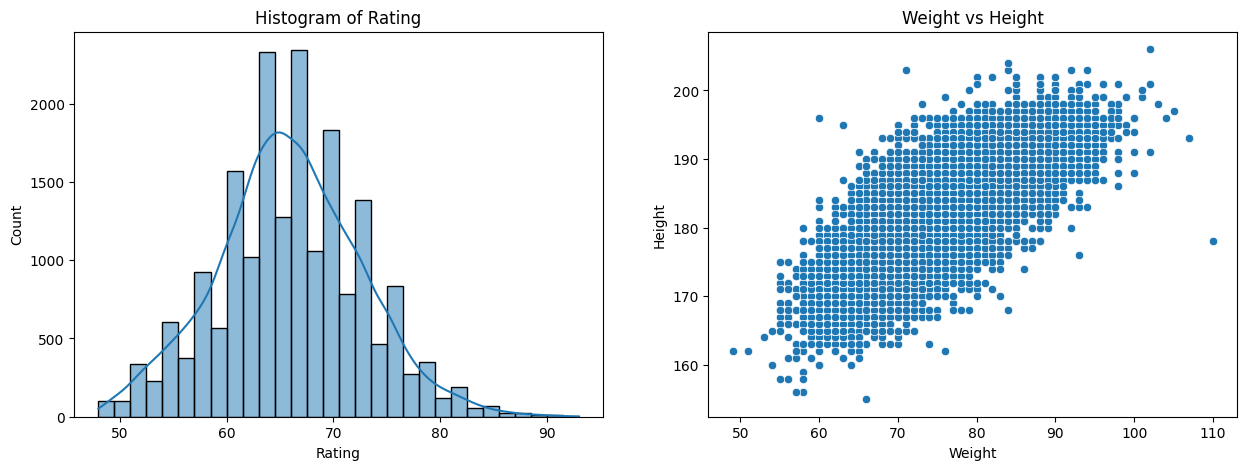

In [7]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Rating'], kde=True, bins=30)
plt.title('Histogram of Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight', y='Height', data=data)
plt.title('Weight vs Height')
plt.show()

statement ???

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [8]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=17)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [9]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [10]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


## Spltting between `X` (Features) and `y` (Target)

In [11]:
# Splitting between `X` and `y`

X = data_train_test.drop(['Rating'], axis=1)
y = data_train_test['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [12]:
# Splitting between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (15400, 13)
Test Size  :  (3850, 13)


## Handling Outlier

Ini akan dijelaskan pada pertemuan Selasa, 01 November 2022.

## Handling Missing Values

Ini akan dijelaskan pada pertemuan Selasa, 01 November 2022

In [13]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [14]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [15]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [16]:
# Check Missing Values in `y_test`

y_test.isnull().sum()

0

## Feature Selection

In [17]:
# Display X_train

X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,Quintana,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,R. Manaj,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,E. Vergani,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,Talles Magno,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,Lee Bum Young,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Ricardo Ferreira,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,Bruno Jordão,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,Lino Essier,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


Berdasarkan Personal Judgement, tidak ada kaitannya antara column `Name` dengan column `Rating`. Hal ini dibuktikan dengan nama `Danu Ronaldo` tidak ada kaitannya dengan nama sepopuler `Cristiano Ronaldo`.

In [18]:
# Drop Column `Name`

X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)
X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


## Split between Numerical Columns and Categorical Columns

In [19]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


In [20]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,63,50,61,61,65,64
4199,24,182,76,3800000,69,72,54,70,28,69
12940,20,186,77,1100000,63,69,51,67,21,54
8147,19,186,70,2600000,85,52,55,76,21,60
15074,32,197,93,160000,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,49,32,45,47,69,59
406,25,174,72,28000000,86,75,73,86,32,62
13702,22,180,73,900000,64,55,60,68,49,60
2191,29,183,77,3500000,67,45,68,66,73,79


## Feature Scaling

In [21]:
X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,63,50,61,61,65,64
4199,24,182,76,3800000,69,72,54,70,28,69
12940,20,186,77,1100000,63,69,51,67,21,54
8147,19,186,70,2600000,85,52,55,76,21,60
15074,32,197,93,160000,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,49,32,45,47,69,59
406,25,174,72,28000000,86,75,73,86,32,62
13702,22,180,73,900000,64,55,60,68,49,60
2191,29,183,77,3500000,67,45,68,66,73,79


In [22]:
X_train_num.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
count,15400.000000,15400.000000,15400.000000,1.540000e+04,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000
mean,25.182273,181.288052,74.926104,2.866596e+06,67.882208,53.550195,57.848117,63.017338,50.084351,64.694740
std,4.729238,6.869126,7.065049,7.538808e+06,10.701932,13.835679,9.807584,9.722490,16.375305,9.631822
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.000000,58.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000
75%,29.000000,186.000000,80.000000,2.100000e+06,75.000000,64.000000,65.000000,69.000000,63.000000,72.000000
max,54.000000,206.000000,107.000000,1.940000e+08,97.000000,94.000000,93.000000,92.000000,91.000000,92.000000


In [23]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

## Feature Encoding

In [24]:
# Display X_train_cat

X_train_cat

,AttackingWorkRate,DefensiveWorkRate
9235,Medium,High
4199,Medium,Medium
12940,High,Medium
8147,High,Medium
15074,Medium,Medium
...,...,...
9529,Low,Medium
406,High,Low
13702,Medium,Medium
2191,Medium,Medium


In [25]:
# Feature Encoding using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                     ['Low', 'Medium', 'High']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[1., 2.],
       [1., 1.],
       [2., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 1.]])

## Concate between Numerical Columns and Categorical Columns

In [26]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.55555556, 1.        ,
        2.        ],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.63492063, 1.        ,
        1.        ],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.3968254 , 2.        ,
        1.        ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.49206349, 1.        ,
        1.        ],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.79365079, 1.        ,
        1.        ],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.73015873, 0.        ,
        1.        ]])

In [27]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,1.0,2.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,1.0,1.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,2.0,1.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,2.0,1.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,0.0,1.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,2.0,0.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,1.0,1.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,1.0,1.0


# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Notes : 

1. Algoritma yang dipakai adalah `Linear Regression`.
   * Alasan ??

2. Metrics yang akan dipakai adalah `Mean Absolute Error (MAE)`.
   * Alasan ??

In [28]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [29]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [30]:
# Predict Train-Set and Test-Set 

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([64.77235831, 67.26408179, 60.64755635, ..., 65.28434857,
       73.09864515, 64.89410413])

In [31]:
# Display `y_train`

y_train

9235     66
4199     71
12940    63
8147     67
15074    61
         ..
9529     66
406      80
13702    62
2191     74
10863    65
Name: Rating, Length: 15400, dtype: int64

In [32]:
# Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error 

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  2.351340115442289
Error - Test Set  :  2.3497331721374164


Statement ???

1. Nyatakan apakah model tergolong overfit, underfit, atau good-fit ?

2. Narasikan dalam hal business

3. Temukan hal yang unik !

# 9 - Model Saving

In [33]:
# Save the Files

import joblib
import json

with open('model/model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('model/model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model/model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('model/list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('model/list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

## Load Model

In [34]:
# Load All Files

import joblib
import json

with open('model/model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model/model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model/model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('model/list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('model/list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

## Inferencing

In [35]:
# Display Inference Set

data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [36]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,32,180,70,675000,73,63,65,67,48,68
1,27,175,75,1500000,71,44,58,61,64,76
2,20,178,65,9500000,85,66,65,79,43,64
3,37,184,81,110000,67,63,67,68,47,69
4,17,188,78,1100000,62,64,62,63,33,65
5,21,178,78,4200000,75,57,67,73,67,71
6,25,170,67,625000,73,61,55,66,39,48
7,24,176,69,775000,62,64,49,66,40,57
8,19,182,68,900000,70,36,51,59,60,58
9,28,176,71,1600000,76,63,63,73,41,64


In [37]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

data_inf_num_scaled

array([[4.21052632e-01, 4.90196078e-01, 3.62068966e-01, 3.47938144e-03,
        6.52173913e-01, 5.92105263e-01, 5.88235294e-01, 6.21212121e-01,
        4.41558442e-01, 6.19047619e-01],
       [2.89473684e-01, 3.92156863e-01, 4.48275862e-01, 7.73195876e-03,
        6.23188406e-01, 3.42105263e-01, 4.85294118e-01, 5.30303030e-01,
        6.49350649e-01, 7.46031746e-01],
       [1.05263158e-01, 4.50980392e-01, 2.75862069e-01, 4.89690722e-02,
        8.26086957e-01, 6.31578947e-01, 5.88235294e-01, 8.03030303e-01,
        3.76623377e-01, 5.55555556e-01],
       [5.52631579e-01, 5.68627451e-01, 5.51724138e-01, 5.67010309e-04,
        5.65217391e-01, 5.92105263e-01, 6.17647059e-01, 6.36363636e-01,
        4.28571429e-01, 6.34920635e-01],
       [2.63157895e-02, 6.47058824e-01, 5.00000000e-01, 5.67010309e-03,
        4.92753623e-01, 6.05263158e-01, 5.44117647e-01, 5.60606061e-01,
        2.46753247e-01, 5.71428571e-01],
       [1.31578947e-01, 4.50980392e-01, 5.00000000e-01, 2.16494845e-02,
   

In [38]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[4.21052632e-01, 4.90196078e-01, 3.62068966e-01, 3.47938144e-03,
        6.52173913e-01, 5.92105263e-01, 5.88235294e-01, 6.21212121e-01,
        4.41558442e-01, 6.19047619e-01, 2.00000000e+00, 0.00000000e+00],
       [2.89473684e-01, 3.92156863e-01, 4.48275862e-01, 7.73195876e-03,
        6.23188406e-01, 3.42105263e-01, 4.85294118e-01, 5.30303030e-01,
        6.49350649e-01, 7.46031746e-01, 1.00000000e+00, 1.00000000e+00],
       [1.05263158e-01, 4.50980392e-01, 2.75862069e-01, 4.89690722e-02,
        8.26086957e-01, 6.31578947e-01, 5.88235294e-01, 8.03030303e-01,
        3.76623377e-01, 5.55555556e-01, 2.00000000e+00, 0.00000000e+00],
       [5.52631579e-01, 5.68627451e-01, 5.51724138e-01, 5.67010309e-04,
        5.65217391e-01, 5.92105263e-01, 6.17647059e-01, 6.36363636e-01,
        4.28571429e-01, 6.34920635e-01, 1.00000000e+00, 1.00000000e+00],
       [2.63157895e-02, 6.47058824e-01, 5.00000000e-01, 5.67010309e-03,
        4.92753623e-01, 6.05263158e-01, 5.44117647e-01, 5.60

In [39]:
# Predict using Linear regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([69.40855954, 68.65888225, 71.67029745, 70.67068251, 62.80545363,
       71.70469958, 61.41859391, 63.16158652, 61.90926356, 68.86685688])

In [40]:
# Create DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rating - Prediction'])
y_pred_inf_df

,Rating - Prediction
0,69.408560
1,68.658882
2,71.670297
3,70.670683
4,62.805454
5,71.704700
6,61.418594
7,63.161587
8,61.909264
9,68.866857


In [41]:
# Concate between Inference-Set and Rating's Prediction

pd.concat([data_inf, y_pred_inf_df], axis=1)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Rating - Prediction
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.408560
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.658882
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.670297
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.670683
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.805454
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,71.704700
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.418594
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,63.161587
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.909264
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.866857


# 11 - Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA.

2. Narasi based on Model Analysis

3. Narasi based on Model Evaluation

4. Further Improvement

5. Hal lain. 

In [42]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Slope     : ', model_lin_reg.coef_)

Intercept :  36.22253237163134
Slope     :  [ 7.5883957   2.06442948  1.05385459 39.15907544  3.15439873  2.99799434
  2.19712841 20.37879803  8.21691507 12.44338743 -0.32725332 -0.50123917]


In [43]:
# List All Columns

X_train_final_df.columns

MultiIndex([(              'Age',),
            (           'Height',),
            (           'Weight',),
            (            'Price',),
            (        'PaceTotal',),
            (    'ShootingTotal',),
            (     'PassingTotal',),
            (   'DribblingTotal',),
            (   'DefendingTotal',),
            ( 'PhysicalityTotal',),
            ('AttackingWorkRate',),
            ('DefensiveWorkRate',)],
           )

In [44]:
import sklearn
sklearn.__version__

'1.1.3'

In [45]:
%pip install -U scikit-learn==1.1.3


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
